In [1]:
import cv2
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from torchvision.transforms import v2 as T
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes, draw_segmentation_masks
import matplotlib.pyplot as plt


In [2]:
device = torch.device('cpu')

model = torch.load('model/entire_model_v2 (1).pth', map_location=torch.device('cpu'))
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [3]:
def get_transform(train):
    transforms = []
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    transforms.append(T.ToDtype(torch.float, scale=True))
    transforms.append(T.ToPureTensor())
    return T.Compose(transforms)

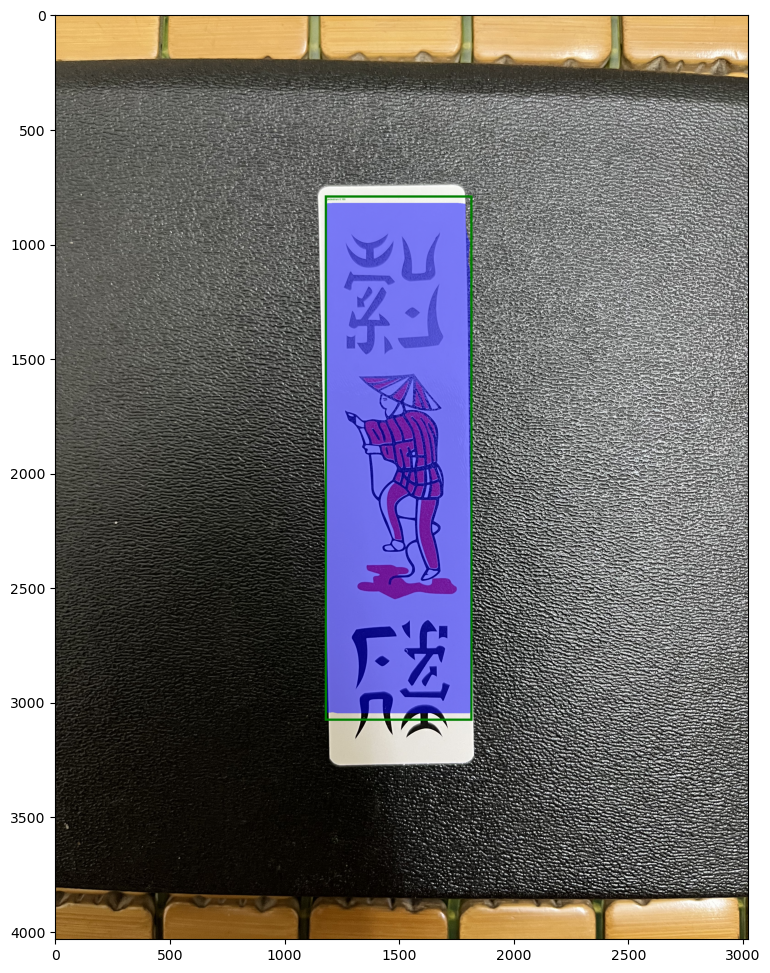

In [4]:
image = read_image("data/IMG_1060.png")
eval_transform = get_transform(train=False)

with torch.no_grad():
    x = eval_transform(image)
    # convert RGBA -> RGB and move to device
    x = x[:3, ...].to(device)
    predictions = model([x, ])
    # pred = predictions[0]


# Ngưỡng điểm số
threshold = predictions[0]['scores'].max()

# Lọc các kết quả dựa trên ngưỡng điểm số
filtered_prediction = {
    'boxes': predictions[0]['boxes'][predictions[0]['scores'] >= threshold],
    'labels': predictions[0]['labels'][predictions[0]['scores'] >= threshold],
    'scores': predictions[0]['scores'][predictions[0]['scores'] >= threshold],
    'masks': predictions[0]['masks'][predictions[0]['scores'] >= threshold]
}

pred = filtered_prediction

image = (255.0 * (image - image.min()) / (image.max() - image.min())).to(torch.uint8)
image = image[:3, ...]
pred_labels = [f"pedestrian: {score:.3f}" for label, score in zip(pred["labels"], pred["scores"])]
pred_boxes = pred["boxes"].long()
output_image = draw_bounding_boxes(image, pred_boxes, pred_labels, colors="green", width=10)

masks = (pred["masks"] > 0.9).squeeze(1)
output_image = draw_segmentation_masks(output_image, masks, alpha=0.5, colors="blue")


plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))

In [12]:
filtered_prediction

{'boxes': tensor([[1177.1189,  787.7281, 1821.1509, 3079.6494]]),
 'labels': tensor([3]),
 'scores': tensor([0.1863]),
 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]])}

In [5]:
# Ngưỡng điểm số
threshold = 0.5

# Lọc các kết quả dựa trên ngưỡng điểm số
filtered_prediction = {
    'boxes': predictions[0]['boxes'][predictions[0]['scores'] > threshold],
    'labels': predictions[0]['labels'][predictions[0]['scores'] > threshold],
    'scores': predictions[0]['scores'][predictions[0]['scores'] > threshold],
    'masks': predictions[0]['masks'][predictions[0]['scores'] > threshold]
}

filtered_prediction

{'boxes': tensor([[ 39.0604, 108.0451, 241.8477, 594.4474],
         [ 40.4403,  31.2839, 246.7234, 282.1270],
         [ 20.6375, 337.5774, 238.5820, 566.8908]]),
 'labels': tensor([1, 1, 1]),
 'scores': tensor([0.9145, 0.7654, 0.5675]),
 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
    

In [6]:
import model

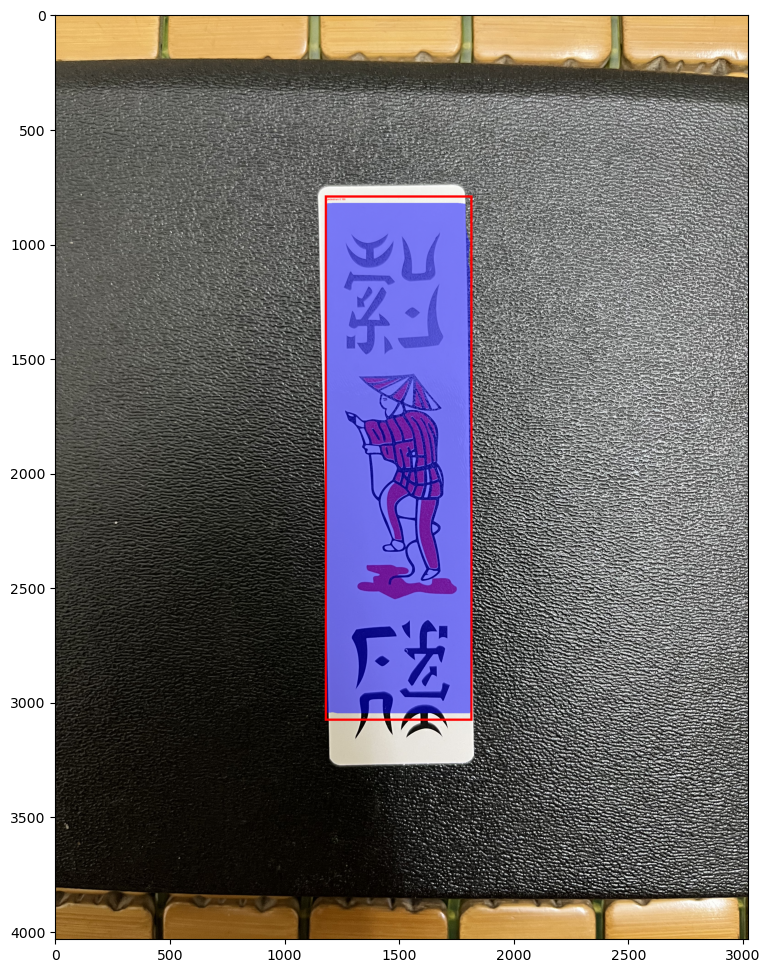

In [7]:
output_image = model.prediction('data/IMG_1060.png')
plt.figure(figsize=(12, 12))
plt.imshow(output_image.permute(1, 2, 0))
